In [16]:
# Imports

import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

%matplotlib inline

In [17]:
# Data reading

data = pd.read_csv('fire.csv')

data.sample(10)

,latitude,longitude,bright_ti4,scan,track,acq_date,acq_time,satellite,instrument,confidence,version,bright_ti5,frp,daynight
771497,-35.98163,147.62836,317.4,0.40,0.37,2019-12-30,1512,N,VIIRS,n,1.0NRT,275.7,2.7,N
577933,-33.88939,150.11458,346.2,0.44,0.62,2019-12-17,254,N,VIIRS,n,1.0NRT,291.7,10.2,D
681999,-13.40557,132.64928,353.3,0.42,0.38,2019-12-22,448,N,VIIRS,n,1.0NRT,307.2,7.2,D
790451,-36.10582,147.79126,316.7,0.40,0.37,2019-12-30,1512,N,VIIRS,n,1.0NRT,297.0,3.9,N
661680,-35.28785,150.06793,367.0,0.41,0.45,2019-12-21,318,N,VIIRS,h,1.0NRT,351.5,69.5,D
201661,-17.03021,145.59628,354.4,0.36,0.57,2019-11-09,312,N,VIIRS,n,1.0NRT,300.8,6.6,D
117714,-13.98433,133.59030,340.9,0.38,0.36,2019-10-25,436,N,VIIRS,n,1.0NRT,308.7,3.2,D
405171,-34.00213,150.31288,332.9,0.60,0.70,2019-12-01,1554,N,VIIRS,n,1.0NRT,281.2,5.4,N
140393,-31.13221,152.45711,301.9,0.40,0.60,2019-10-31,1536,N,VIIRS,n,1.0NRT,284.7,1.0,N
168417,-33.12597,150.53584,303.8,0.41,0.37,2019-11-07,1506,N,VIIRS,n,1.0NRT,289.0,0.7,N


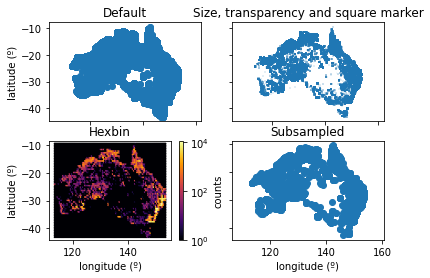

In [18]:
fig, ax = plt.subplots(2, 2)

# Common settings
for a in ax.flat:
    a.axis('equal')
    a.set_xlabel('longitude (º)')
    a.set_ylabel('latitude (º)')
    a.label_outer()

# Matplotlib defaults
ax[0, 0].scatter(data['longitude'], data['latitude'])
ax[0, 0].set_title('Default')

# Size and transparency 
size = data['scan'] * data['track'] * 5 # The latter is just a scale factor to set the desired size
ax[0, 1].scatter(data['longitude'], data['latitude'], alpha=.1, s=size, marker='s')
ax[0, 1].set_title('Size, transparency and square marker')

# Hexbin
hb = ax[1, 0].hexbin(data['longitude'], data['latitude'], gridsize=100, bins='log', cmap='inferno')
fig.colorbar(hb, ax=ax[1, 0]).set_label('counts')
ax[1, 0].set_title('Hexbin')

# Subsampled
n_samples = len(data.index)
samples = np.random.choice(n_samples, int(n_samples/100))
ax[1, 1].scatter(data.loc[samples, 'longitude'], data.loc[samples, 'latitude'])
ax[1, 1].set_title('Subsampled')

plt.show()